In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

## Implementación modelo Heitler-Matthews

In [7]:
tau = 3.9e7 ## 1/eV
air_rho = 0.00019 #g/cm3
m = 139.6e6 #eV

In [8]:
def mult(E):
    return 0.15*np.power(E,0.11)

def l(E):
    ## 1/eV
    return ((200 - 3.3*np.log(E))/(air_rho*100))/(1.973e-7)

def E_pion(E0,n):
    
    return E0/mult(E0)**n
    
def X(h):
    return 1030*np.exp(-h/8)

def P_survive(lamb,energy):
    g = energy / m
    v = np.sqrt(1 - 1/g**2)
    return np.exp(-lamb/(v*g*tau))

def single(energy,rlenght,N_level):
    
    N_decay = int(N_level*(1-P_survive(rlenght,energy))*(2/3))
    N_interaction = int(mult(energy)*N_level*(P_survive(rlenght,energy))*(2/3))
    
    return N_interaction , N_decay
    

In [9]:

E0 = 1e18

L = []
N = []
Nd = []
Nd.append(0)
N.append(1)
NtimesEn=[]
E_n=[]

n=0
while N[n]>0:

    E_n.append(E_pion(E0,n))

    if E_pion(E0,n) < m:
        print('Energy limit')
        break
    
    L.append(l(E_pion(E0,n))) 
    
    N_interaction , N_decay = single(E_pion(E0,n),L[n],N[n])
    
    
    
    n +=1
    
    Nd.append(N_decay)
    
    N.append( N[n-1] +  N_interaction - N_decay)
    

X=np.cumsum(np.array(L))* (air_rho*100)*(1.973e-7)
X = np.insert(X,0,0)


#print(X)   
#print(N)
#print(Nd)
#print(E_n)
#print(len(N))

Energy limit


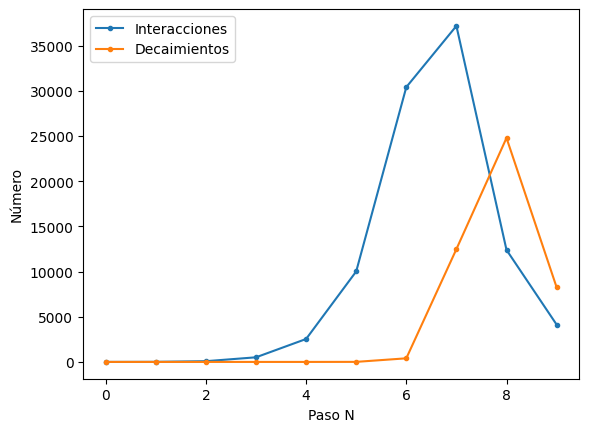

In [10]:
steps = np.arange(0,len(N))

plt.plot(steps,np.array(N),'.-',label='Interacciones')
plt.plot(steps,np.array(Nd),'.-',label='Decaimientos')
plt.xlabel('Paso N')
plt.ylabel('Número')
plt.legend()

plt.savefig('hadronic_shower.png' , bbox_inches = 'tight')

## Visualización


In [11]:
import numpy as np
import matplotlib.pyplot as plt

def propagate_particles(A):
    fig, ax = plt.subplots()
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks
    ax.set_xticklabels([])  # Remove x-axis tick labels
    ax.set_yticklabels([])  # Remove y-axis tick labels

    current_points = [(0, 0)]  # Start with a single point at (0, 0)

    for num_particles in A:
        new_points = []
        if num_particles == 1:
            angles = [0]  # Set angle to zero if num_particles is 1
        else:
            angles = np.arange(2*np.pi/3, -2*np.pi/3, -2*np.pi/num_particles)  # Calculate angles for new points

        for point in current_points:
            for angle in angles:
                x = point[0] + 1
                y = point[1] + np.sin(angle)
                new_points.append((x, y))
                ax.plot([point[0], x], [point[1], y], color='blue')  # Draw lines from previous points to new points

        current_points = new_points

    plt.show()
    plt.savefig('shower_diag.png')



<ipython-input-12-4421c6c93e0b>:3: RuntimeWarning: divide by zero encountered in log
  Ndlog = np.log(Nd).astype('int')


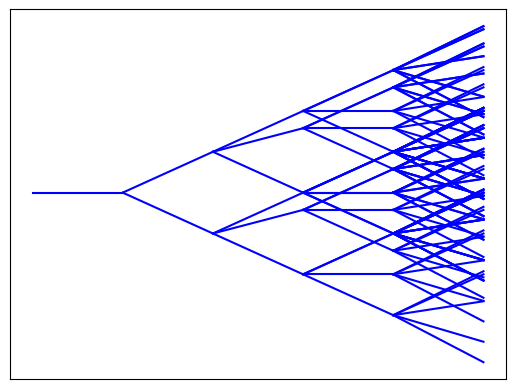

<Figure size 640x480 with 0 Axes>

In [12]:
Nlog = np.log(N).astype('int')
Nlog[0]=1
Ndlog = np.log(Nd).astype('int')
Ndlog[0:5]=0
propagate_particles(Nlog[0:5])